**Problem 4**

Dental implant data: The hardness of metal implants in dental cavities depends on multiple factors, such as the method of implant, the temperature at which the metal is treated, the alloy used as well as the dentists who may favor one method above another and may work better in his/her favorite method. The response is the variable of interest.

**Import Libraries**

In [30]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

**Connect google colab to google Drive**

In [31]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Let us now load the dataset.

**Reading the datasets**

In [32]:
data = pd.read_excel('/content/drive/MyDrive/Inferential Statistics Project/Dental Hardness data.xlsx')

**Data Overview**

1)Observing the first few rows of the dataset

2)Getting information about the number of rows and columns

3)Finding out the data types of the columns

4)Checking the statistical summary

In [33]:
data.head()

,Dentist,Method,Alloy,Temp,Response
0,1,1,1,1500,813
1,1,1,1,1600,792
2,1,1,1,1700,792
3,1,1,2,1500,907
4,1,1,2,1600,792


Displaying the first 5 rows of the dataset

**This data set contain information**
The dataset includes information about dentist its method  alloy , temp AND Responce

**Understanding the shape of the dataset**

In [34]:
data.shape

(90, 5)

There are 90  rows and 5 columns in the dataset.

**Checking the data types of the columns for the dataset**

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Dentist   90 non-null     int64
 1   Method    90 non-null     int64
 2   Alloy     90 non-null     int64
 3   Temp      90 non-null     int64
 4   Response  90 non-null     int64
dtypes: int64(5)
memory usage: 3.6 KB


All The columns are integer type and containing numbers . there is no any null value in any of column.



**Getting the statistical summary for the dataset**

In [36]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Dentist,90.0,3.000000,1.422136,1.0,2.0,3.0,4.0,5.0
Method,90.0,2.000000,0.821071,1.0,1.0,2.0,3.0,3.0
Alloy,90.0,1.500000,0.502801,1.0,1.0,1.5,2.0,2.0
Temp,90.0,1600.000000,82.107083,1500.0,1500.0,1600.0,1700.0,1700.0
Response,90.0,741.777778,145.767845,289.0,698.0,767.0,824.0,1115.0


Dentist: There are 5 unique dentists (ranging from 1 to 5).

Method: There are 3 unique methods (ranging from 1 to 3).

Alloy: There are 2 unique alloys (ranging from 1 to 2).

Temp: There are 3 unique temperatures (1500, 1600, and 1700).

Response: This is the variable of interest, representing hardness. The values range from 289 to 1115, with a mean of approximately 741.78 and a standard deviation of about 145.77.

All columns are of integer type and have no missing values.

## Analyze the effect of dentists on hardness


Use appropriate statistical methods to determine if there are significant differences in implant hardness across different dentists.



Perform a one-way ANOVA test to compare the mean `Response` for each `Dentist`. If the ANOVA test is significant (p-value < 0.05), perform Tukey's HSD post-hoc test to identify which specific pairs of dentists have significantly different mean hardness values.



In [37]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

Perform one-way ANOVA to analyze the effect of Dentist on Response

In [38]:
model = ols('Response ~ C(Dentist)', data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print("One-way ANOVA table for Dentist effect:")
print(anova_table)

One-way ANOVA table for Dentist effect:
                  sum_sq    df         F    PR(>F)
C(Dentist)  1.577946e+05   4.0  1.934537  0.112066
Residual    1.733301e+06  85.0       NaN       NaN


Check for significance and perform post-hoc test if the main effect is significant

In [39]:
alpha = 0.05
if anova_table['PR(>F)'].iloc[0] < alpha:
    print("\nThe main effect of Dentist is statistically significant. Performing Tukey's HSD post-hoc test.")
    tukey_result = pairwise_tukeyhsd(endog=data['Response'], groups=data['Dentist'], alpha=alpha)
    print(tukey_result)
else:
    print(f"\nMain effect of Dentist is not significant (p = {anova_table['PR(>F)'].iloc[0]:.4f}).")


Main effect of Dentist is not significant (p = 0.1121).


## Analyze the effect of methods on hardness


Use appropriate statistical methods  ANOVA or t-tests to determine if there are significant differences in implant hardness across different methods.



Perform a one-way ANOVA test to determine if there are significant differences in implant hardness across different methods and perform Tukey's HSD post-hoc test if the ANOVA is significant.



Perform one-way ANOVA to analyze the effect of Method on Response

In [40]:

model_method = ols('Response ~ C(Method)', data=data).fit()
anova_table_method = sm.stats.anova_lm(model_method, typ=2)

print("One-way ANOVA table for Method effect:")
print(anova_table_method)

One-way ANOVA table for Method effect:
                 sum_sq    df         F        PR(>F)
C(Method)  5.934275e+05   2.0  19.89268  7.683892e-08
Residual   1.297668e+06  87.0       NaN           NaN


# Check for significance and perform post-hoc test if the main effect is significant

In [41]:

alpha = 0.05
if anova_table_method['PR(>F)'].iloc[0] < alpha:
    print("\nThe main effect of Method is statistically significant. Performing Tukey's HSD post-hoc test.")
    tukey_result_method = pairwise_tukeyhsd(endog=data['Response'], groups=data['Method'], alpha=alpha)
    print(tukey_result_method)
else:
    print(f"\nMain effect of Method is not significant (p = {anova_table_method['PR(>F)'].iloc[0]:.4f}).")


The main effect of Method is statistically significant. Performing Tukey's HSD post-hoc test.
   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2  meandiff p-adj    lower     upper   reject
---------------------------------------------------------
     1      2   10.4333 0.9415  -64.7584   85.6251  False
     1      3    -166.8    0.0 -241.9917  -91.6083   True
     2      3 -177.2333    0.0 -252.4251 -102.0416   True
---------------------------------------------------------


Check for significance and perform post-hoc test if the main effect is significant

In [42]:
alpha = 0.05
if anova_table_method['PR(>F)'].iloc[0] < alpha:
    print("\nThe main effect of Method is statistically significant. Performing Tukey's HSD post-hoc test.")
    tukey_result_method = pairwise_tukeyhsd(endog=data['Response'], groups=data['Method'], alpha=alpha)
    print(tukey_result_method)
else:
    print("\nThe main effect of Method is not statistically significant (p >= {}). No significant difference in mean hardness across methods based on this test.".format(alpha))


The main effect of Method is statistically significant. Performing Tukey's HSD post-hoc test.
   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2  meandiff p-adj    lower     upper   reject
---------------------------------------------------------
     1      2   10.4333 0.9415  -64.7584   85.6251  False
     1      3    -166.8    0.0 -241.9917  -91.6083   True
     2      3 -177.2333    0.0 -252.4251 -102.0416   True
---------------------------------------------------------


## Analyze the interaction effect between dentist and method for each alloy


For each alloy type, investigate the interaction effect between dentists and methods on implant hardness using two-way ANOVA.



Filter the data for each alloy type and perform two-way ANOVA to check the interaction effect between Dentist and Method on Response.



# Filter data for each alloy type

In [43]:
data_alloy1 = data[data['Alloy'] == 1].copy()
data_alloy2 = data[data['Alloy'] == 2].copy()


# Perform two-way ANOVA for Alloy 1

In [44]:
model_alloy1 = ols('Response ~ C(Dentist) + C(Method) + C(Dentist):C(Method)', data=data_alloy1).fit()
anova_table_alloy1 = sm.stats.anova_lm(model_alloy1, typ=2)
print("Two-way ANOVA table for Alloy 1 (Dentist, Method, and Interaction):")
display(anova_table_alloy1)

Two-way ANOVA table for Alloy 1 (Dentist, Method, and Interaction):


,sum_sq,df,F,PR(>F)
C(Dentist),106683.688889,4.0,3.899638,0.011484
C(Method),148472.177778,2.0,10.854287,0.000284
C(Dentist):C(Method),185941.377778,8.0,3.398383,0.006793
Residual,205180.000000,30.0,NaN,NaN


# Check for significant interaction for Alloy 1

In [63]:
alpha = 0.05
if 'C(Dentist):C(Method)' in anova_table_alloy1.index and anova_table_alloy1.loc['C(Dentist):C(Method)', 'PR(>F)'] < alpha:
    print(f"For Alloy 1: There is a statistically significant interaction effect between Dentist and Method (p = {anova_table_alloy1.loc['C(Dentist):C(Method)', 'PR(>F)']:.4f}).")
else:
    print(f"For Alloy 1: There is no statistically significant interaction effect between Dentist and Method (p = {anova_table_alloy1.loc['C(Dentist):C(Method)', 'PR(>F)']:.4f}).")

For Alloy 1: There is a statistically significant interaction effect between Dentist and Method (p = 0.0068).


# Perform two-way ANOVA for Alloy 2

In [46]:
model_alloy2 = ols('Response ~ C(Dentist) + C(Method) + C(Dentist):C(Method)', data=data_alloy2).fit()
anova_table_alloy2 = sm.stats.anova_lm(model_alloy2, typ=2)
print("Two-way ANOVA table for Alloy 2 (Dentist, Method, and Interaction):")
display(anova_table_alloy2)

Two-way ANOVA table for Alloy 2 (Dentist, Method, and Interaction):


,sum_sq,df,F,PR(>F)
C(Dentist),56797.911111,4.0,1.106152,0.371833
C(Method),499640.400000,2.0,19.461218,0.000004
C(Dentist):C(Method),197459.822222,8.0,1.922787,0.093234
Residual,385104.666667,30.0,NaN,NaN


# Check for significant interaction for Alloy 2

In [47]:
if 'C(Dentist):C(Method)' in anova_table_alloy2.index and anova_table_alloy2.loc['C(Dentist):C(Method)', 'PR(>F)'] < alpha:
    print(f"For Alloy 2: There is a statistically significant interaction effect between Dentist and Method (p = {anova_table_alloy2.loc['C(Dentist):C(Method)', 'PR(>F)']:.4f}).")
else:
    print(f"For Alloy 2: There is no statistically significant interaction effect between Dentist and Method (p = {anova_table_alloy2.loc['C(Dentist):C(Method)', 'PR(>F)']:.4f}).")

For Alloy 2: There is no statistically significant interaction effect between Dentist and Method (p = 0.0932).


## Analyze the combined effect of dentists and methods on hardness


Use a multi-factor ANOVA to analyze how the combination of dentists and methods affects implant hardness.



Perform a two-way ANOVA on the entire dataset to analyze the combined effect of Dentist and Method on Response, including their interaction.



# Perform two-way ANOVA on the entire dataset to analyze the combined effect of Dentist and Method

In [48]:

model_dentist_method = ols('Response ~ C(Dentist) + C(Method) + C(Dentist):C(Method)', data=data).fit()
anova_table_dentist_method = sm.stats.anova_lm(model_dentist_method, typ=2)

print("Two-way ANOVA table for Dentist, Method, and their interaction (Overall):")
display(anova_table_dentist_method)

Two-way ANOVA table for Dentist, Method, and their interaction (Overall):


,sum_sq,df,F,PR(>F)
C(Dentist),157794.555556,4.0,3.550086,1.045384e-02
C(Method),593427.488889,2.0,26.702047,1.750208e-09
C(Dentist):C(Method),306471.844444,8.0,3.447526,1.969515e-03
Residual,833401.666667,75.0,NaN,NaN



Interpret the significance of the main effects of 'Dentist' and 'Method', as well as the interaction effect based on the p-values from the ANOVA table.



# Interpret the ANOVA results based on p-values

In [49]:

alpha = 0.05

print("\nInterpretation of the Two-way ANOVA results (Overall):")

if anova_table_dentist_method['PR(>F)']['C(Dentist)'] < alpha:
    print(f"- The main effect of Dentist is statistically significant (p = {anova_table_dentist_method['PR(>F)']['C(Dentist)']:.4f}). This suggests that, overall, the average hardness of dental implants differs significantly among the various dentists.")
else:
    print(f"- The main effect of Dentist is not statistically significant (p = {anova_table_dentist_method['PR(>F)']['C(Dentist)']:.4f}).")




Interpretation of the Two-way ANOVA results (Overall):
- The main effect of Dentist is statistically significant (p = 0.0105). This suggests that, overall, the average hardness of dental implants differs significantly among the various dentists.


# Check significance for the main effect of Method

In [50]:

if anova_table_dentist_method['PR(>F)']['C(Method)'] < alpha:
    print(f"- The main effect of Method is statistically significant (p = {anova_table_dentist_method['PR(>F)']['C(Method)']:.4f}). This indicates that, overall, the average hardness of dental implants differs significantly depending on the method used.")
else:
    print(f"- The main effect of Method is not statistically significant (p = {anova_table_dentist_method['PR(>F)']['C(Method)']:.4f}).")


- The main effect of Method is statistically significant (p = 0.0000). This indicates that, overall, the average hardness of dental implants differs significantly depending on the method used.


# Check significance for the interaction effect between Dentist and Method

In [51]:
if anova_table_dentist_method['PR(>F)']['C(Dentist):C(Method)'] < alpha:
    print(f"- The interaction effect between Dentist and Method is statistically significant (p = {anova_table_dentist_method['PR(>F)']['C(Dentist):C(Method)']:.4f}). This is a crucial finding, suggesting that the effect of the method on hardness is not consistent across all dentists, and vice versa. The combined effect is more than just the sum of their individual effects.")
else:
    print(f"- The interaction effect between Dentist and Method is not statistically significant (p = {anova_table_dentist_method['PR(>F)']['C(Dentist):C(Method)']:.4f}).")

- The interaction effect between Dentist and Method is statistically significant (p = 0.0020). This is a crucial finding, suggesting that the effect of the method on hardness is not consistent across all dentists, and vice versa. The combined effect is more than just the sum of their individual effects.



Create box plots to visualize the distribution of 'Response' for each 'Dentist', 'Method', and 'Alloy'.



# Create box plots to visualize the distribution of Hardness by Dentist, Method, and Alloy

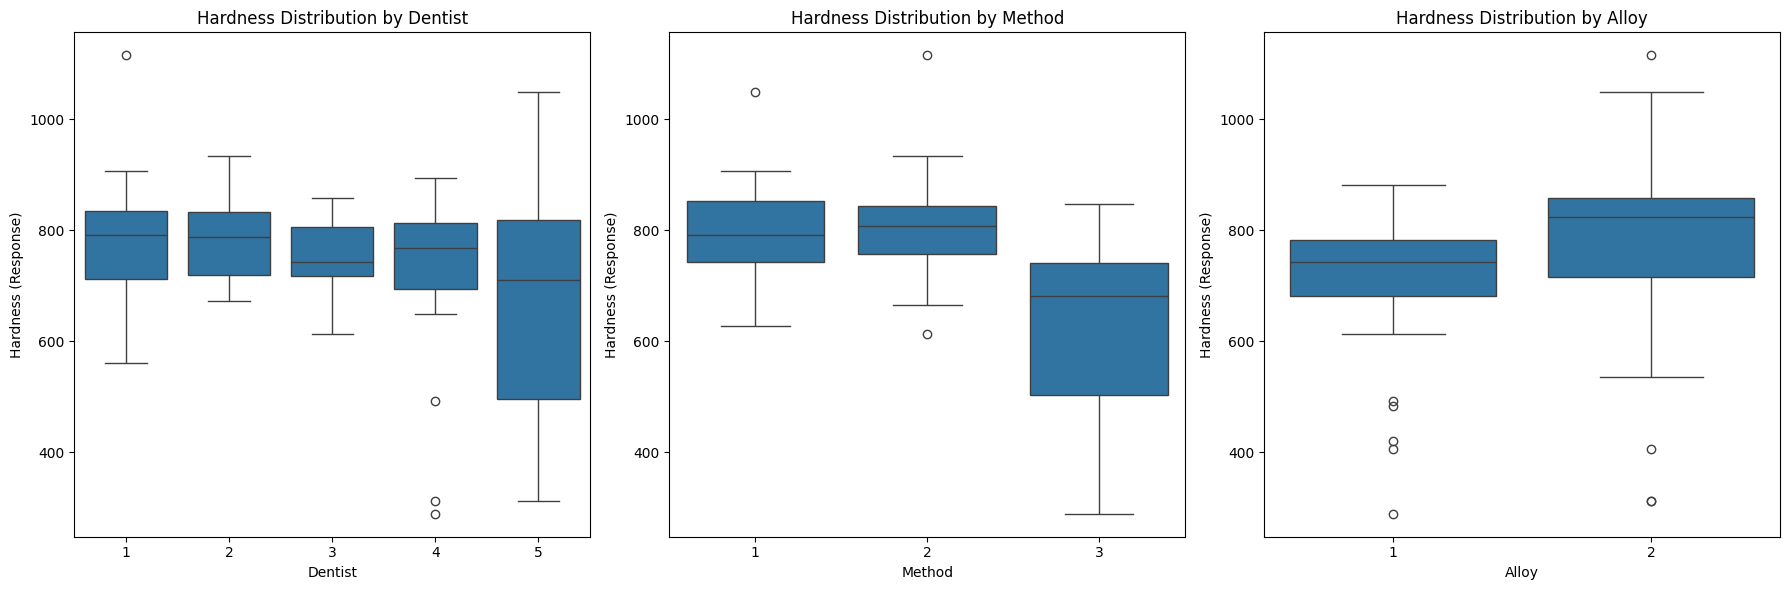

In [52]:

plt.figure(figsize=(18, 6))

# Box plot for Hardness by Dentist
plt.subplot(1, 3, 1)
sns.boxplot(x='Dentist', y='Response', data=data)
plt.title('Hardness Distribution by Dentist')
plt.xlabel('Dentist')
plt.ylabel('Hardness (Response)')

# Box plot for Hardness by Method
plt.subplot(1, 3, 2)
sns.boxplot(x='Method', y='Response', data=data)
plt.title('Hardness Distribution by Method')
plt.xlabel('Method')
plt.ylabel('Hardness (Response)')

# Box plot for Hardness by Alloy
plt.subplot(1, 3, 3)
sns.boxplot(x='Alloy', y='Response', data=data)
plt.title('Hardness Distribution by Alloy')
plt.xlabel('Alloy')
plt.ylabel('Hardness (Response)')

plt.tight_layout()
plt.show()

# Create an interaction plot to visualize the interaction between Dentist and Method on Hardness (Overall)



/tmp/ipython-input-53-3379570670.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(x='Dentist', y='Response', hue='Method', data=data, dodge=True, ci=None)


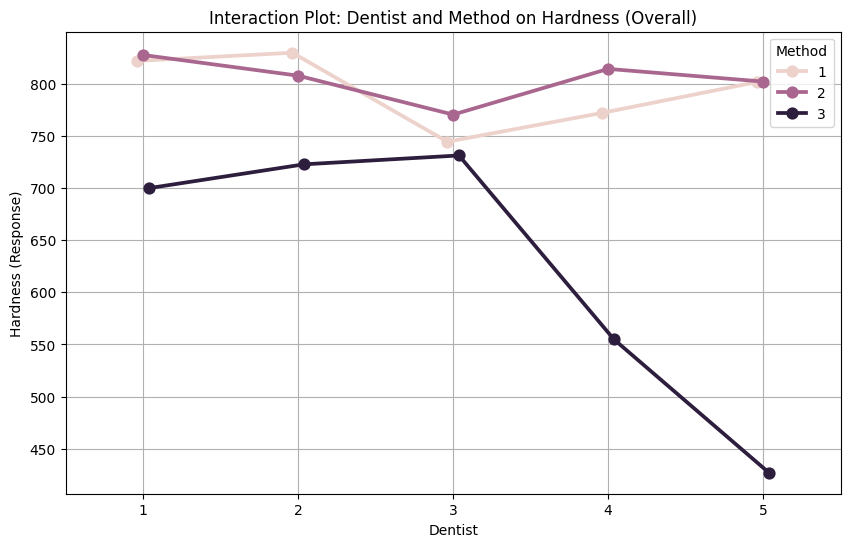

In [53]:

plt.figure(figsize=(10, 6))
sns.pointplot(x='Dentist', y='Response', hue='Method', data=data, dodge=True, ci=None)
plt.title('Interaction Plot: Dentist and Method on Hardness (Overall)')
plt.xlabel('Dentist')
plt.ylabel('Hardness (Response)')
plt.legend(title='Method')
plt.grid(True)
plt.show()

# Create interaction plots to visualize the interaction between Dentist and Method on Hardness for each Alloy type



/tmp/ipython-input-54-3824510181.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(x='Dentist', y='Response', hue='Method', data=data_alloy1, dodge=True, ci=None) # ci=None for cleaner plot
/tmp/ipython-input-54-3824510181.py:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(x='Dentist', y='Response', hue='Method', data=data_alloy2, dodge=True, ci=None)


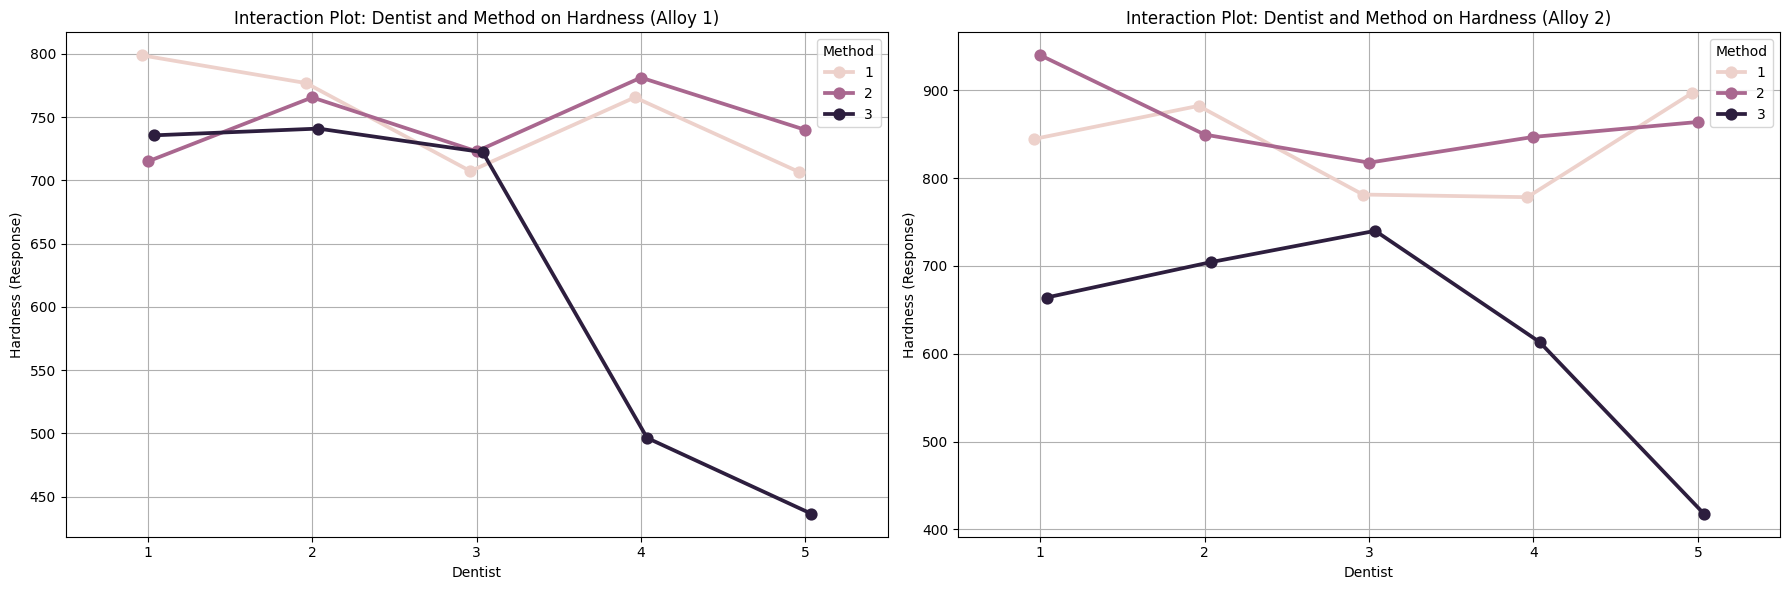

In [54]:

plt.figure(figsize=(18, 6))

# Interaction plot for Alloy 1
plt.subplot(1, 2, 1)
sns.pointplot(x='Dentist', y='Response', hue='Method', data=data_alloy1, dodge=True, ci=None) # ci=None for cleaner plot
plt.title('Interaction Plot: Dentist and Method on Hardness (Alloy 1)')
plt.xlabel('Dentist')
plt.ylabel('Hardness (Response)')
plt.legend(title='Method')
plt.grid(True)

# Interaction plot for Alloy 2
plt.subplot(1, 2, 2)
sns.pointplot(x='Dentist', y='Response', hue='Method', data=data_alloy2, dodge=True, ci=None)
plt.title('Interaction Plot: Dentist and Method on Hardness (Alloy 2)')
plt.xlabel('Dentist')
plt.ylabel('Hardness (Response)')
plt.legend(title='Method')
plt.grid(True)

plt.tight_layout()
plt.show()

**Conclusion for Interaction Plots (Alloy 1 and Alloy 2)**

The interaction plots visually support the findings from the two-way ANOVA.

**For Alloy 1 (Left Plot):** The lines for the different methods are not parallel. This non-parallelism visually confirms the statistically significant interaction effect between Dentist and Method for Alloy 1 (as indicated by the ANOVA p-value of 0.0068). This suggests that the optimal method for achieving desired hardness with Alloy 1 depends on the specific dentist performing the procedure. For example, Dentist 1 and 5 show a notable difference in hardness across methods, while for Dentist 3, the methods seem to result in more similar hardness values.

**For Alloy 2 (Right Plot):** The lines for the different methods appear more parallel compared to Alloy 1. This visual parallelism aligns with the statistically non-significant interaction effect between Dentist and Method for Alloy 2 (as indicated by the ANOVA p-value of 0.0932). This suggests that for Alloy 2, the relative effectiveness of the methods is generally consistent across different dentists. While there are variations in hardness levels for each method, the pattern across dentists is similar.